In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir("/Users/Aaron-MAC/Development/Kaggle/Santander")
import pandas as pd
import numpy as np
from modules.pre_process import feed_training_data, feed_test_data, products, get_feature
from modules.get_data import *
import xgboost as xgb

ImportError: No module named xgboost

In [2]:
cache = pd.read_csv("data/train_ver2.csv").fillna(-2.)

/Users/Aaron-MAC/anaconda/envs/mlp/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train1 = get_training_data(year=2015, month=6, cache=cache)
train2 = get_training_data(year=2015, month=5, cache=cache)
train2 = get_training_data(year=2015, month=4, cache=cache)

In [9]:
sel = set(train2.loc[:, ['ncodpers']])
train1['sel'] = train1['ncodpers'].isin(sel)
new_user = train1.loc[~train1['sel']]
new_user['filter'] = new_user.loc[:, ["diff_"+x for x in products]].abs().sum(1)
new_user = new_user.loc[new_user['filter']>0]

In [16]:
feature = get_feature(new_user)

In [19]:
feature.describe().to_csv('view.csv')

In [89]:
from sklearn.cluster import MiniBatchKMeans
k_means = MiniBatchKMeans(n_clusters=10)
k_means = k_means.fit(X_train, y_train)
cluster = k_means.predict(X_train)

Init 1/3 with method: k-means++
Inertia for init 1/3: 961.305918
Init 2/3 with method: k-means++
Inertia for init 2/3: 1063.208491
Init 3/3 with method: k-means++
Inertia for init 3/3: 1050.915907
Minibatch iteration 1/30500: mean batch inertia: 3.878381, ewa inertia: 3.878381 
Minibatch iteration 2/30500: mean batch inertia: 4.431171, ewa inertia: 3.882012 
Minibatch iteration 3/30500: mean batch inertia: 3.993300, ewa inertia: 3.882743 
Minibatch iteration 4/30500: mean batch inertia: 3.125563, ewa inertia: 3.877770 
Minibatch iteration 5/30500: mean batch inertia: 3.323376, ewa inertia: 3.874128 
Minibatch iteration 6/30500: mean batch inertia: 6.404866, ewa inertia: 3.890752 
Minibatch iteration 7/30500: mean batch inertia: 3.391421, ewa inertia: 3.887472 
Minibatch iteration 8/30500: mean batch inertia: 3.265292, ewa inertia: 3.883385 
Minibatch iteration 9/30500: mean batch inertia: 3.067797, ewa inertia: 3.878027 
Minibatch iteration 10/30500: mean batch inertia: 3.321912, ewa i

Computing label assignment and total inertia


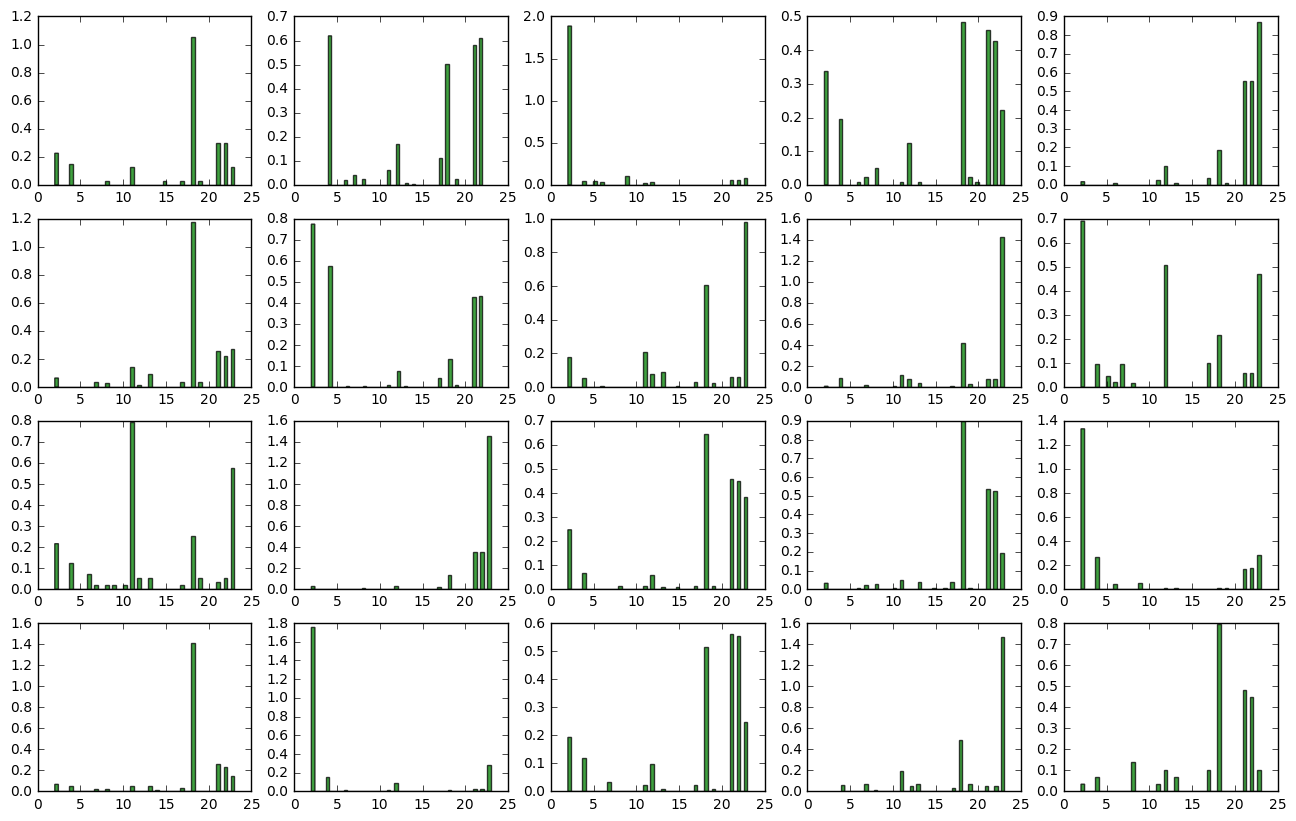

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(16,10))


for i in range(20):
    count = len(y_train[train_class==i])
    x = y_train[train_class==i]
    ax = fig.add_subplot(4,5,i+1)
    n, bins, patches = ax.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

In [205]:
X_train, y_train = feed_training_data(year=2015, month=5, cache=cache, mul_y=False)
X_test = feed_test_data(year=2016, month=5, cache=cache)

In [206]:
X_test_unred = X_test.copy()
test_set = get_test_data(year=2016, month=5, cache=cache)

In [207]:
from sklearn.preprocessing import MaxAbsScaler

pre_processor = MaxAbsScaler()
X_train = pre_processor.fit_transform(X_train)
X_test = pre_processor.transform(X_test)

In [218]:

X_train_all = get_feature(cache).iloc[:, 1:].values
X_train_all.shape


(13647309, 25)

In [221]:
import cPickle as pickle
with open("modules/x_train_all.pkl", 'w') as f:
    pickle.dump(X_train_all, f)

KeyboardInterrupt: 

In [224]:
from sklearn.cluster import MiniBatchKMeans
num_cluster = 100
k_means = MiniBatchKMeans(n_clusters=num_cluster, verbose=True)


k_means = k_means.fit(X_train_all)





train_class = k_means.predict(X_train)
test_class= k_means.predict(X_test)

Init 1/3 with method: k-means++
Inertia for init 1/3: 772.073242
Init 2/3 with method: k-means++
Inertia for init 2/3: 192.847388
Init 3/3 with method: k-means++
Inertia for init 3/3: 203.205943
Minibatch iteration 1/13647400: mean batch inertia: 1.361005, ewa inertia: 1.361005 
Minibatch iteration 2/13647400: mean batch inertia: 1.121448, ewa inertia: 1.361001 
Minibatch iteration 3/13647400: mean batch inertia: 0.842367, ewa inertia: 1.360994 
Minibatch iteration 4/13647400: mean batch inertia: 1.171768, ewa inertia: 1.360991 
Minibatch iteration 5/13647400: mean batch inertia: 1.101602, ewa inertia: 1.360987 
Minibatch iteration 6/13647400: mean batch inertia: 1.231966, ewa inertia: 1.360985 
Minibatch iteration 7/13647400: mean batch inertia: 1.041692, ewa inertia: 1.360981 
Minibatch iteration 8/13647400: mean batch inertia: 0.947314, ewa inertia: 1.360975 
Minibatch iteration 9/13647400: mean batch inertia: 1.128416, ewa inertia: 1.360971 
[MiniBatchKMeans] Reassigning 2 cluster 

ValueError: Incorrect number of features. Got 34 features, expected 25

In [223]:

arr = []
for i in range(24):
    sel = y_train==i
    
    if len(X_train[sel])>0:
        arr.append(X_train[sel].mean(0))
        

feature_sel = np.array(arr).std(0)

X_train = X_train[:, feature_sel>0.01]
X_test = X_test[:, feature_sel>0.01]

In [225]:
X_train.shape

(30445, 34)

In [211]:
from sklearn.linear_model import LogisticRegression

models = []

for i in range(num_cluster):
    sel = train_class==i
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.)
    model = model.fit(X_train[sel], y_train[sel])
    models.append(model)

In [189]:
from sklearn.ensemble import GradientBoostingClassifier

models = []

for i in range(num_cluster):
    sel = train_class==i
    model = GradientBoostingClassifier(verbose=True, n_estimators=200)
    model = model.fit(X_train[sel], y_train[sel])
    models.append(model)  

      Iter       Train Loss   Remaining Time 
         1        7462.8873           23.84s
         2        6638.3817           20.64s
         3        6073.2151           20.66s
         4        5653.8772           20.03s
         5        5320.8267           20.91s
         6        5056.7670           20.78s
         7        4836.2295           20.47s
         8        4652.2806           20.44s
         9        4497.0100           19.97s
        10        4362.7562           19.89s
        20        3646.6679           17.80s
        30        3345.8381           17.18s
        40        3161.3319           16.23s
        50        3025.5514           15.39s
        60        2908.6540           14.43s
        70        2811.8323           13.26s
        80        2730.0397           11.92s
        90        2647.7895           10.88s
       100        2574.1245            9.65s
       200        2090.6647            0.00s
      Iter       Train Loss   Remaining Time 
        

In [191]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(verbose=True, n_estimators=100)
model = model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1       72667.7615            1.33m
         2       65614.8459            1.33m
         3       60744.8544            1.30m
         4       57128.2899            1.29m
         5       54304.6298            1.28m
         6       52061.6114            1.27m
         7       50195.9573            1.26m
         8       48641.6424            1.25m
         9       47304.3776            1.23m
        10       46197.5917            1.23m
        20       40384.5480            1.07m
        30       38275.3046           55.81s
        40       37233.3295           47.77s
        50       36563.6362           39.75s
        60       36108.7735           31.72s
        70       35733.4760           23.81s
        80       35396.0541           16.04s
        90       35113.1272            8.04s
       100       34856.2954            0.00s


In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, verbose=True)
model = model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.7s finished


In [212]:
predict = np.zeros((X_test.shape[0], 24))
for i in range(num_cluster):
    model = models[i]
    predict1 = model.predict_proba(X_test)*((test_class==i)[:,None])
    print predict1.shape
    predict_expand = []
    for j in range(24):
        if j in model.classes_:
            idx = list(model.classes_).index(j)
            predict_expand.append(predict1[:,idx])
        else:
            predict_expand.append(np.zeros((len(predict),)))
    predict_expand = np.array(predict_expand).T
    predict += predict_expand

(931453, 11)
(931453, 13)
(931453, 12)
(931453, 14)
(931453, 11)
(931453, 12)
(931453, 12)
(931453, 13)
(931453, 13)
(931453, 12)
(931453, 16)
(931453, 8)
(931453, 13)
(931453, 15)
(931453, 11)
(931453, 13)
(931453, 9)
(931453, 12)
(931453, 16)
(931453, 11)
(931453, 14)
(931453, 13)
(931453, 13)
(931453, 12)
(931453, 12)
(931453, 11)
(931453, 8)
(931453, 12)
(931453, 18)
(931453, 11)
(931453, 7)
(931453, 12)
(931453, 11)
(931453, 12)
(931453, 9)
(931453, 14)
(931453, 8)
(931453, 10)
(931453, 11)
(931453, 12)
(931453, 14)
(931453, 13)
(931453, 10)
(931453, 14)
(931453, 11)
(931453, 8)
(931453, 9)
(931453, 6)
(931453, 9)
(931453, 14)
(931453, 16)
(931453, 11)
(931453, 13)
(931453, 14)
(931453, 11)
(931453, 12)
(931453, 11)
(931453, 10)
(931453, 11)
(931453, 13)
(931453, 13)
(931453, 12)
(931453, 10)
(931453, 13)
(931453, 13)
(931453, 12)
(931453, 7)
(931453, 13)
(931453, 11)
(931453, 13)
(931453, 12)
(931453, 13)
(931453, 14)
(931453, 12)
(931453, 5)
(931453, 14)
(931453, 11)
(931453, 12

In [192]:
predict = model.predict_proba(X_test)

model.classes_

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23])

In [193]:
predict = np.hstack([np.zeros((predict.shape[0],2)), predict])

In [213]:
mask = X_test_unred[:, :24]==0
predict = predict*mask

In [215]:
predict

array([[ 0.        ,  0.        ,  0.32280732, ...,  0.00717791,
         0.00717791,  0.05734443],
       [ 0.        ,  0.        ,  0.        , ...,  0.03156074,
         0.03156074,  0.57766704],
       [ 0.        ,  0.        ,  0.        , ...,  0.02883378,
         0.02883378,  0.52222991],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.08313362,
         0.08680276,  0.58035253],
       [ 0.        ,  0.        ,  0.        , ...,  0.08271312,
         0.08271116,  0.63940396],
       [ 0.        ,  0.        ,  0.78331671, ...,  0.01811832,
         0.01811832,  0.02958959]])

In [216]:
f = open("outputs/test_3.csv", 'w')
f.write("ncodpers,added_products\n")

user_id = test_set['ncodpers']

count = np.bincount(y_train)
ban_list = np.argwhere(count<count.max()*0.005)[:,0]
print ban_list
print len(predict)

for idx,r in enumerate(predict):
    order = [i[0] for i in sorted(enumerate(r), key=lambda x:x[1], reverse=True)]
    order = [x for x in order if x not in ban_list]
    select = order[:min(7,len(order))]
    f.write(str(user_id[idx])+","+(" ".join([products[s] for s in select]))+'\n')
f.close()

[ 0  1  3 10 14 15 16 20]
931453


In [217]:
from modules.evaluation import *
eval_submission('test_3.csv', year=2016, month=5, cache=cache)

0.06487153114714725

In [167]:
count = np.bincount(y_train)
ban_list = np.argwhere(count<count.max()*0.01)[:,0]
print ban_list
print count

[ 0  1  3 10 14 15 16 20]
[   0    0 5355    7 1987   84  308  298  174  435   25 1005 1480  438   11
   24   13  343 4191  213    4 3444 3423 7183]


In [210]:
cache["indrel_1mes"].drop_duplicates()

0            1
261         -2
34117        3
345803       2
3784704    1.0
3784910      1
3787486      3
3789784    3.0
3791902    2.0
3792759    4.0
3793334      P
3794936      4
3857560      4
3887238      2
Name: indrel_1mes, dtype: object